# Star Wars Survey and Data Cleaning

In [1]:
# Packages and imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [3]:
# Drop rows with missind RespondentIDs
cond = star_wars['RespondentID'].notnull()
star_wars = star_wars[cond]

# Print basic info
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                       

In [4]:
# Rename cols to be more convienent, we may revisit this later to expand
col_rename_map = {
    "Have you seen any of the 6 films in the Star Wars franchise?": "seen_films",
    "Do you consider yourself to be a fan of the Star Wars film franchise?": "fan_status",
    "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_ep_1",
    "Do you consider yourself to be a fan of the Star Trek franchise?": "st_fan_status",
    "Unnamed: 4": "seen_ep_2",
    "Unnamed: 5": "seen_ep_3",
    "Unnamed: 6": "seen_ep_4",
    "Unnamed: 7": "seen_ep_5",
    "Unnamed: 8": "seen_ep_6",
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "rank_ep_1",
    "Unnamed: 10": "rank_ep_2",
    "Unnamed: 11": "rank_ep_3",
    "Unnamed: 12": "rank_ep_4",
    "Unnamed: 13": "rank_ep_5",
    "Unnamed: 14": "rank_ep_6"
}
star_wars = star_wars.rename(columns=col_rename_map)


In [5]:
# Convert "Yes"/"No" responses to boolean
print(star_wars["fan_status"].value_counts(dropna=False))


to_boolean = {
    "yes": True,
    "no": False
}
    
cols = ["seen_films", "fan_status", "st_fan_status"]
star_wars[cols] = star_wars[cols].applymap(lambda s: to_boolean[s.lower()] if isinstance(s, str) else s)
print(star_wars["fan_status"].value_counts(dropna=False))


Yes    552
NaN    350
No     284
Name: fan_status, dtype: int64
True     552
NaN      350
False    284
Name: fan_status, dtype: int64


In [6]:
to_boolean = {
    "Star Wars: Episode I  The Phantom Menace": True,
    "Star Wars: Episode II  Attack of the Clones": True,
    "Star Wars: Episode III  Revenge of the Sith": True,
    "Star Wars: Episode IV  A New Hope": True,
    "Star Wars: Episode V The Empire Strikes Back": True,
    "Star Wars: Episode VI Return of the Jedi": True,
    np.nan: False
}
cols = ["seen_ep_{}".format(k) for k in range(1,7)]
star_wars[cols] = star_wars[cols].applymap(lambda s: to_boolean[s])

for col in cols:
    print(star_wars[col].value_counts(dropna=False))

True     673
False    513
Name: seen_ep_1, dtype: int64
False    615
True     571
Name: seen_ep_2, dtype: int64
False    636
True     550
Name: seen_ep_3, dtype: int64
True     607
False    579
Name: seen_ep_4, dtype: int64
True     758
False    428
Name: seen_ep_5, dtype: int64
True     738
False    448
Name: seen_ep_6, dtype: int64


In [7]:
# Convert ranking cols to numeric type
cols = ["rank_ep_{}".format(k) for k in range(1,7)]
star_wars[cols] = star_wars[cols].astype(float)

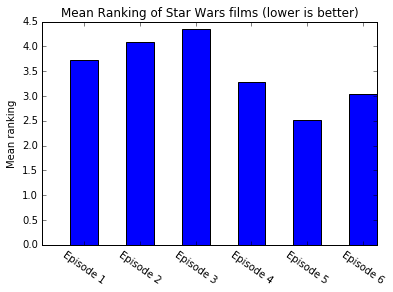

In [8]:
# Let's look at highest-ranked film in the series
cols = ["rank_ep_{}".format(k) for k in range(1,7)]
mean_ranks = star_wars[cols].mean()

x = np.arange(len(mean_ranks))
width = 0.5
fig, ax = plt.subplots()
ax.bar(x+width, mean_ranks, width, color='b')

ax.set_ylabel('Mean ranking'), ax.set_title('Mean Ranking of Star Wars films (lower is better)')
ax.set_xticks(x+1.5*width)
ax.set_xticklabels(['Episode {}'.format(k) for k in range(1,7)], rotation=-35)

We note that 'Original Trilogy' (OT) of films (Episodes 4, 5, & 6) are more highly rated on average.

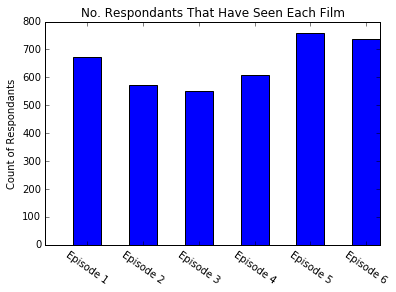

In [9]:
cols = ["seen_ep_{}".format(k) for k in range(1,7)]
film_view_counts = star_wars[cols].sum()

x = np.arange(len(film_view_counts))
width = 0.5
fig, ax = plt.subplots()
ax.bar(x+width, film_view_counts, width, color='b')

ax.set_ylabel('Count of Respondants'), ax.set_title('No. Respondants That Have Seen Each Film')
ax.set_xticks(x+1.5*width)
ax.set_xticklabels(['Episode {}'.format(k) for k in range(1,7)], rotation=-35)

Here we see that the respondants report to have seen the OT films more than the more recent trilogy. One surprising thing is that more people indicated that they had seen Episodes 5 and 6 than Episode 4.

Next let's break the population of respondants down into more subgroups and see how the series fared within these groups.

## Analysis by Gender

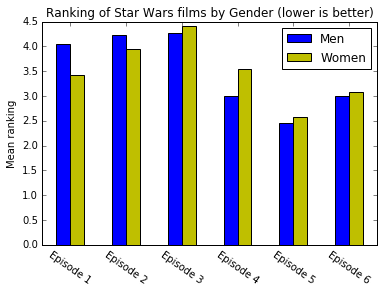

In [10]:
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']
genders = {"male":male, "female":female}

cols = ["rank_ep_{}".format(k) for k in range(1,7)]
gender_ranks = {}
for gender in genders:
    df = genders[gender]
    gender_ranks[gender] = df[cols].mean()

x = np.arange(len(gender_ranks["male"]))
width = 0.25
fig, ax = plt.subplots()

bars = {}
colors = 'by'
for idx, gender in enumerate(genders):
    x = x + width
    bars[gender] = ax.bar(x, gender_ranks[gender], width, color=colors[idx])

ax.set_ylabel('Mean ranking'), ax.set_title('Ranking of Star Wars films by Gender (lower is better)')
ax.set_xticks(x)
ax.set_xticklabels(['Episode {}'.format(k) for k in range(1,7)], rotation=-35)
ax.legend((bars["male"], bars["female"]), ('Men', 'Women'))

Breaking the analysis by gender we see that Men and Women roughly agreed in their rankings of Episodes 2, 3, 5, and 6. The biggest discrepancy occurs between the initial films of the two trilogys (Episodes 1 and 4), with Women on average tending to rank Episode 1 more highly, while Men on average prefered Episode 4.

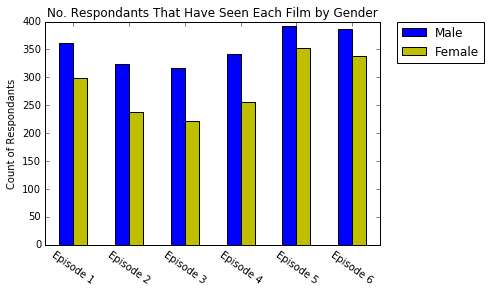

In [11]:
cols = ["seen_ep_{}".format(k) for k in range(1,7)]

gender_view_counts = {}
for gender in genders:
    df = genders[gender]
    gender_view_counts[gender] = df[cols].sum()

x = np.arange(len(gender_view_counts["male"]))
width = 0.25
fig, ax = plt.subplots()

bars = {}
colors = 'by'
for idx, gender in enumerate(genders):
    x = x + width
    bars[gender] = ax.bar(x, gender_view_counts[gender], width, color=colors[idx], label=gender.title())

ax.set_ylabel('Count of Respondants'), ax.set_title('No. Respondants That Have Seen Each Film by Gender')
ax.set_xticks(x)
ax.set_xticklabels(['Episode {}'.format(k) for k in range(1,7)], rotation=-35)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Analysis by Star Wars Fans

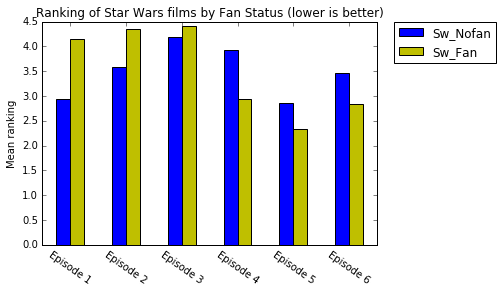

In [12]:
sw_fan = star_wars[star_wars['fan_status']==True]
sw_nofan = star_wars[star_wars['fan_status']==False]
fan_status = {"sw_fan":sw_fan, "sw_nofan":sw_nofan}

cols = ["rank_ep_{}".format(k) for k in range(1,7)]
fan_ranks = {}
for status in fan_status:
    df = fan_status[status]
    fan_ranks[status] = df[cols].mean()

x = np.arange(len(fan_ranks["sw_fan"]))
width = 0.25
fig, ax = plt.subplots()

bars = {}
colors = 'by'
for idx, status in enumerate(fan_status):
    x = x + width
    bars[status] = ax.bar(x, fan_ranks[status], width, color=colors[idx], label=status.title())

ax.set_ylabel('Mean ranking'), ax.set_title('Ranking of Star Wars films by Fan Status (lower is better)')
ax.set_xticks(x)
ax.set_xticklabels(['Episode {}'.format(k) for k in range(1,7)], rotation=-35)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

On average, self-identified fans of the Star Wars series greatly prefer the OT compared to Episodes 1-3. In contrast, self-identified non-fans of Star Wars are significantly more likely to rank Episode 1 more favorably. In fact, the greatest discriminator between these two goups is the gap between the two groups ranking of Episode 1 vs Episode 4. Perhaps this indicates an alternate way to identify a Star Wars fan vs non-fan is to ask "Episode 1 or Episode 4?"

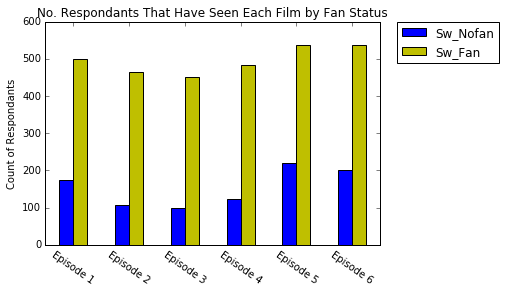

In [13]:
cols = ["seen_ep_{}".format(k) for k in range(1,7)]

fan_view_counts = {}
for status in fan_status:
    df = fan_status[status]
    fan_view_counts[status] = df[cols].sum()

x = np.arange(len(fan_view_counts["sw_fan"]))
width = 0.25
fig, ax = plt.subplots()

bars = {}
colors = 'by'
for idx, status in enumerate(fan_status):
    x = x + width
    bars[gender] = ax.bar(x, fan_view_counts[status], width, color=colors[idx], label=status.title())

ax.set_ylabel('Count of Respondants'), ax.set_title('No. Respondants That Have Seen Each Film by Fan Status')
ax.set_xticks(x)
ax.set_xticklabels(['Episode {}'.format(k) for k in range(1,7)], rotation=-35)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Unsurprisingly, for any given film, more fans of the series have that film than non-fans. What is surprising is that fan or non-fan, Episode 5 still has the largest number of respondants having seen the film. 

## Analysis by Star Trek Fans

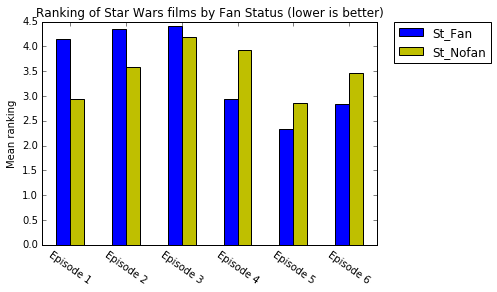

In [15]:
st_fan = star_wars[star_wars['st_fan_status']==True]
st_nofan = star_wars[star_wars['st_fan_status']==False]
fan_status = {"st_fan":sw_fan, "st_nofan":sw_nofan}

cols = ["rank_ep_{}".format(k) for k in range(1,7)]
fan_ranks = {}
for status in fan_status:
    df = fan_status[status]
    fan_ranks[status] = df[cols].mean()

x = np.arange(len(fan_ranks["st_fan"]))
width = 0.25
fig, ax = plt.subplots()

bars = {}
colors = 'by'
for idx, status in enumerate(fan_status):
    x = x + width
    bars[status] = ax.bar(x, fan_ranks[status], width, color=colors[idx], label=status.title())

ax.set_ylabel('Mean ranking'), ax.set_title('Ranking of Star Wars films by Fan Status (lower is better)')
ax.set_xticks(x)
ax.set_xticklabels(['Episode {}'.format(k) for k in range(1,7)], rotation=-35)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

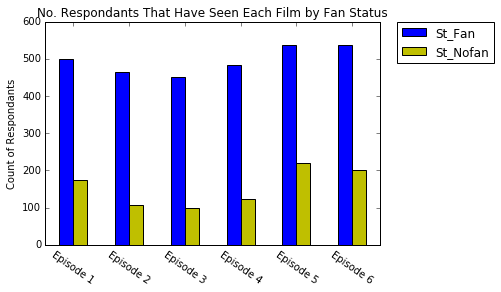

In [17]:
cols = ["seen_ep_{}".format(k) for k in range(1,7)]

fan_view_counts = {}
for status in fan_status:
    df = fan_status[status]
    fan_view_counts[status] = df[cols].sum()

x = np.arange(len(fan_view_counts["st_fan"]))
width = 0.25
fig, ax = plt.subplots()

bars = {}
colors = 'by'
for idx, status in enumerate(fan_status):
    x = x + width
    bars[gender] = ax.bar(x, fan_view_counts[status], width, color=colors[idx], label=status.title())

ax.set_ylabel('Count of Respondants'), ax.set_title('No. Respondants That Have Seen Each Film by Fan Status')
ax.set_xticks(x)
ax.set_xticklabels(['Episode {}'.format(k) for k in range(1,7)], rotation=-35)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)